In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile, os
local_zip = '/content/drive/MyDrive/Colab Notebooks/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('content')
zip_ref.close()




In [ ]:
base_dir = "/content/content/flowers"
f_daisy = os.path.join(base_dir, 'daisy')
f_dandelion = os.path.join(base_dir, 'dandelion')
f_rose = os.path.join(base_dir, 'rose')
f_sunflower = os.path.join(base_dir, 'sunflower')
f_tulip = os.path.join(base_dir, 'tulip')
print(len(os.listdir(f_daisy)))

769


In [ ]:
pip install split-folders --upgrade --quiet

In [ ]:
import splitfolders
splitfolders.ratio("/content/content/flowers", output="Tr-Te-Val", ratio=(0.8,0.1,0.1))

Copying files: 4326 files [00:08, 539.94 files/s]


In [ ]:
#os.removedirs("/content/Tr-Te-Val/train/flowers")
os.removedirs("/content/Tr-Te-Val/val/flowers")
os.removedirs("/content/Tr-Te-Val/test/flowers")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(
      rescale = 1./255,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)
train_dir = os.path.join("/content/Tr-Te-Val/train")
val_dir = os.path.join("/content/Tr-Te-Val/val")
test_dir = os.path.join("/content/Tr-Te-Val/test")

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(331,331),
    shuffle=True,
    class_mode='categorical',
    batch_size=32,
    seed = 123
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(331,331),
    shuffle=True,
    class_mode='categorical',
    batch_size=32,
    seed= 123
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(331,331),
    seed= 123,
    batch_size=32,
    shuffle =False
)

Found 3457 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 436 images belonging to 5 classes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
a = train_generator.class_indices
print(list(a.keys()))
classes = list(a.keys())

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


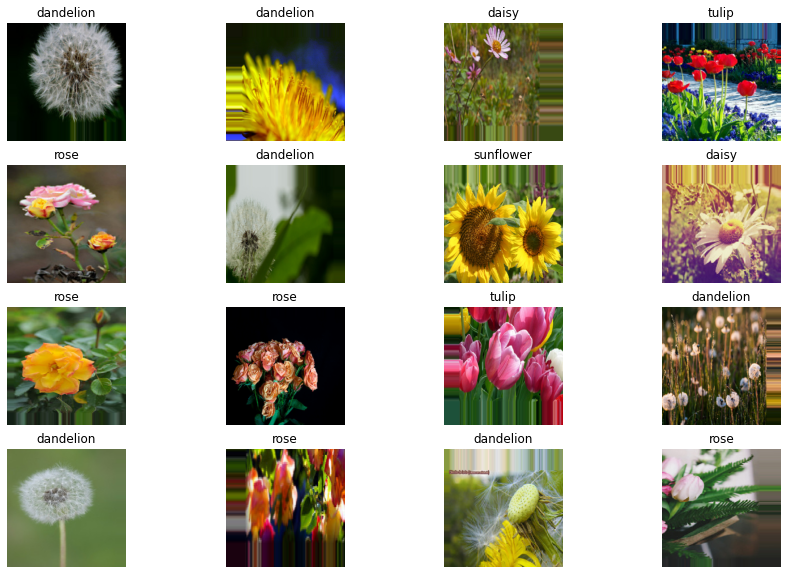

In [ ]:
X, Y = next(train_generator)
def plot_images(img, labels):
  plt.figure(figsize=(15, 10))
  for i in range(16):
      plt.subplot(4,4,i+1)
      plt.imshow(img[i])
      plt.title(classes[np.argmax(labels[i])])
      plt.axis('off')

plot_images(X,Y)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(331, 331, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')                                
])

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 329, 329, 16)      448       
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 164, 164, 16)      0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 162, 162, 64)      9280      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 81, 81, 64)        0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 419904)            0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 419904)            0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)             

In [ ]:
model.save('Model.h5')
my_calls = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
            keras.callbacks.ModelCheckpoint("Model.h5",verbose=1,save_best_only=True)]

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=25,
    validation_data=val_generator, 
)

Epoch 1/25
16/16 [==============================] - 81s 5s/step - loss: 4.7409 - accuracy: 0.2969 - val_loss: 1.4890 - val_accuracy: 0.3209
Epoch 2/25
16/16 [==============================] - 81s 5s/step - loss: 1.4628 - accuracy: 0.3438 - val_loss: 1.3201 - val_accuracy: 0.4372
Epoch 3/25
16/16 [==============================] - 83s 5s/step - loss: 1.3672 - accuracy: 0.4121 - val_loss: 1.3364 - val_accuracy: 0.3977
Epoch 4/25
16/16 [==============================] - 81s 5s/step - loss: 1.3139 - accuracy: 0.4648 - val_loss: 1.2902 - val_accuracy: 0.4628
Epoch 5/25
16/16 [==============================] - 81s 5s/step - loss: 1.2840 - accuracy: 0.4707 - val_loss: 1.3034 - val_accuracy: 0.4907
Epoch 6/25
16/16 [==============================] - 81s 5s/step - loss: 1.2572 - accuracy: 0.5098 - val_loss: 1.2147 - val_accuracy: 0.4814
Epoch 7/25
16/16 [==============================] - 81s 5s/step - loss: 1.1692 - accuracy: 0.5254 - val_loss: 1.2008 - val_accuracy: 0.5186
Epoch 8/25
16/16 [==